This notebook is for demonstrating the usage of the solver sub-module.

In [1]:
from orangearg.argument.miner.solver import Adaptor, Collector, QuadraticEnergySolver
import pandas as pd

df_nodes = pd.DataFrame({
    "argument": ["Buy", "Sell", "1", "2", "3", "4", "5"], 
    "coherence": [0.5, 0.5, 0.8, 0.7, 0.3, 0.9, 0.9]
})

df_attacks = pd.DataFrame({
    "source": [0, 1, 3, 4, 5, 6], 
    "target": [1, 0, 2, 3, 4, 2]
})

df_supports = pd.DataFrame({
    "source": [2, 3, 5, 6], 
    "target": [1, 0, 3, 0]
})

In [2]:
# What the data adaptor will do is to transfer the input dataframes into 
# weight and parent vectors that will be used in the next steps
data_adaptor = Adaptor(arguments=df_nodes, attacks=df_attacks, supports=df_supports)
print(f"weights: {data_adaptor.compute_weights()}")
print(f"parent_vectors: \n{data_adaptor.compute_parent_vectors()}")

weights: [0.5 0.5 0.8 0.7 0.3 0.9 0.9]
parent_vectors: 
[[ 0. -1.  0.  1.  0.  0.  1.]
 [-1.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0. -1.]
 [ 0.  0.  0.  0. -1.  1.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


In [3]:
solver  = QuadraticEnergySolver(step_size=10e-2, max_iter=10e5, epsilon=10e-4, data_adaptor=data_adaptor)
print(f"strength_vector: {solver.strength_vector}")
print(f"weight_vector: {solver.weights}")
print(f"parent_vectors: \n {solver.parent_vectors}")

strength_vector: [0.5 0.5 0.8 0.7 0.3 0.9 0.9]
weight_vector: [0.5 0.5 0.8 0.7 0.3 0.9 0.9]
parent_vectors: 
 [[ 0. -1.  0.  1.  0.  0.  1.]
 [-1.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0. -1.]
 [ 0.  0.  0.  0. -1.  1.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


In [4]:
# Solve the input graph
final_step, data_collector = solver.solve(approximator="RK4", collect_data=True)
print(f"Convergence reached at step {final_step}: {solver.strength_vector}")

Convergence reached at step 51: [0.83879517 0.35903012 0.18565675 0.94283093 0.16630631 0.9
 0.9       ]


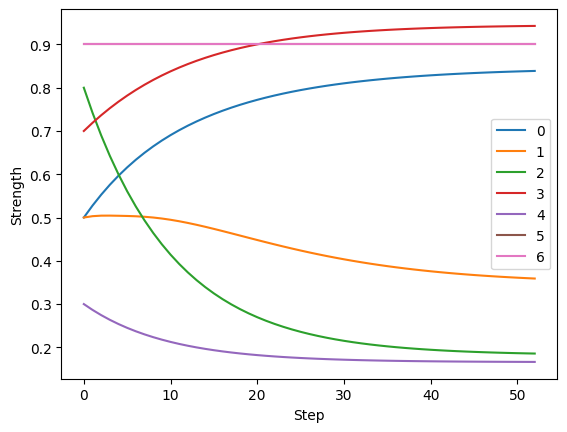

In [5]:
# Plot the process of convergence
fig = data_collector.plot()